# Explore NYC Yellow Taxi Data using Spark

In this notebook, you'll learn the basic steps to load and analyze an Open Dataset that tracks NYC Yellow Taxi trips with Apache Spark for Azure Synapse.




## Load Data

Read NYC Yellow Taxi data as a Spark DataFrame object to manipulate.

In [1]:
# Read NYC yellow cab data from Azure Open Datasets
from azureml.opendatasets import NycTlcYellow

from datetime import datetime
from dateutil import parser

end_date = parser.parse('2018-05-08 00:00:00')
start_date = parser.parse('2018-05-01 00:00:00')

nyc_tlc = NycTlcYellow(start_date=start_date, end_date=end_date)
df_nyc_tlc = nyc_tlc.to_spark_dataframe()

## Analyze the NYC Taxi data using Spark and notebooks


In [2]:
df_nyc_tlc.printSchema()

root
 |-- vendorID: string (nullable = true)
 |-- tpepPickupDateTime: timestamp (nullable = true)
 |-- tpepDropoffDateTime: timestamp (nullable = true)
 |-- passengerCount: integer (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: string (nullable = true)
 |-- doLocationId: string (nullable = true)
 |-- startLon: double (nullable = true)
 |-- startLat: double (nullable = true)
 |-- endLon: double (nullable = true)
 |-- endLat: double (nullable = true)
 |-- rateCodeId: integer (nullable = true)
 |-- storeAndFwdFlag: string (nullable = true)
 |-- paymentType: string (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: string (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- puYear: integer (nullable = true)
 |-- puMonth: integer (nullable = true)

In [3]:
from pyspark.sql import functions as F
df_nyc = df_nyc_tlc.groupBy("passengerCount").agg(F.avg('tripDistance').alias('AvgTripDistance'), F.sum('tripDistance').alias('SumTripDistance'))
display(df_nyc)

## Customize data visualization with Spark and notebooks
You can control how charts render by using notebooks. The following code shows a simple example. It uses the popular libraries matplotlib and seaborn. The code renders the same kind of line chart as the SQL queries we ran earlier.



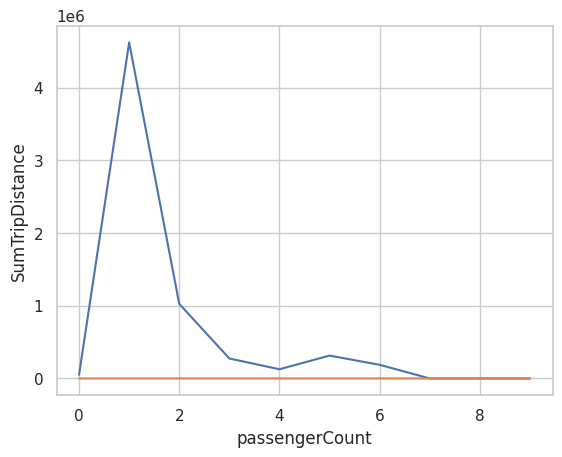

In [4]:
import matplotlib.pyplot
import seaborn

seaborn.set(style = "whitegrid")
pdf_nyc = df_nyc.toPandas()
seaborn.lineplot(x="passengerCount", y="SumTripDistance" , data = pdf_nyc)
seaborn.lineplot(x="passengerCount", y="AvgTripDistance" , data = pdf_nyc)
matplotlib.pyplot.show()

## Clean up resources
To ensure the Spark instance is shut down, end any connected sessions(notebooks). The pool shuts down when the **idle time** specified in the Apache Spark pool is reached. You can also select **stop session** from the status bar at the upper right of the notebook.

![stopsession](https://adsnotebookrelease.blob.core.windows.net/adsnotebookrelease/adsnotebook/image/stopsession.png)